# 第一题
对数中心变化

In [22]:

import numpy as np
import pandas as pd
data=pd.read_excel(r"D:\adocument\数学建模\24年国赛\训练\2022年\附件表单2.xlsx",sheet_name=0)
log_mean=0
def log_data(data):
    data=data+1e-9
    log_datas=np.log(data)
    #计算对数数据的中心值
    log_mean=np.mean(log_datas)
    centered_log_data=log_datas-log_mean
    return centered_log_data
def original_log_data(data):
    original_data=np.exp(data+log_mean)
    return original_data
#print(data)
#rint(cl_data)
    

# 第二题
决策树划分玻璃种类

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

columns= cl_data.columns
x=data[columns[2:16]]
y=data['类型']
x=log_data(x)
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)

# In[]训练决策树模型
clf=DecisionTreeClassifier(random_state=42)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
# 评估模型性能（准确率）
accuracy = clf.score(x_test, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 1.0


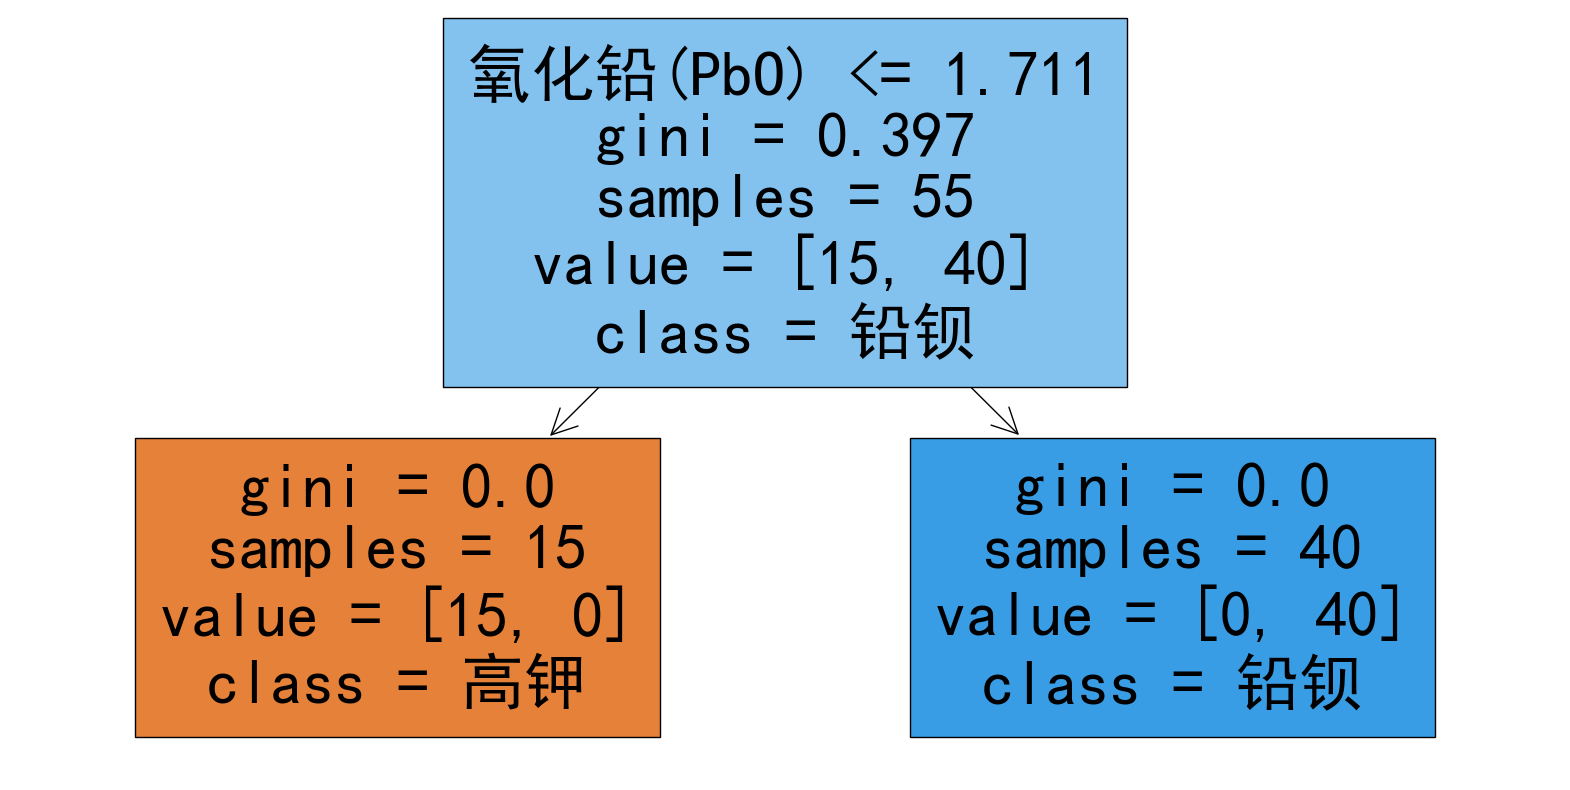

Feature importances: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [17]:
# In[]可视化决策树
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=columns[2:16].tolist(), class_names=['高钾', '铅钡'], filled=True)
plt.show()
# In[]打印特征重要性
print("Feature importances:", clf.feature_importances_)

In [18]:
print(original_log_data(1.711))

5.534493204504091


# n_clusters确定
1. 肘部法 (Elbow Method)

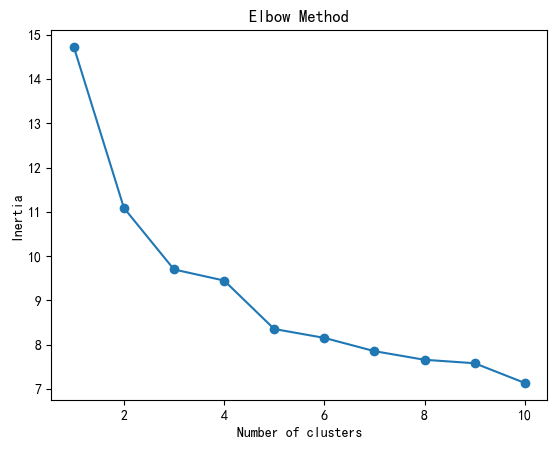

In [53]:
X=pd.concat([x, y], axis=1)
# 计算 Gower 距离矩阵
distance_matrix = gower.gower_matrix(X)
# 存储每个簇数量的总成本（簇内距离）
cost = []
# 遍历簇的数量，从1到10
for k in range(1, 11):
    kmedoids = KMedoids(n_clusters=k, metric='precomputed', random_state=42)
    kmedoids.fit(distance_matrix)
    cost.append(kmedoids.inertia_)  # inertia_表示簇内的总距离
# 绘制肘部法图
plt.plot(range(1, 11), cost, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

2. 轮廓系数

轮廓系数衡量样本聚类后的紧密性和分离性，它取值在 [-1, 1] 之间，**值越大**表示聚类效果越好

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

# 遍历簇的数量，从2到10（轮廓系数不适用于k=1）
for k in range(2, 11):
    kmedoids = KMedoids(n_clusters=k, metric='precomputed', random_state=42)
    kmedoids.fit(distance_matrix)
    silhouette_scores.append(silhouette_score(distance_matrix, kmedoids.labels_, metric='precomputed'))

# 绘制轮廓系数图
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


## K-medoid聚类
+ K-Medoids 是 K-Means 的一种变体，更适合处理定类变量和定量变量的混合数据。K-Medoids 选择实际数据点作为聚类中心（称为 Medoid），并基于某种距离度量（如 Gower’s Distance）对数据进行聚类。
+ 受初始条件和极值情况影响较小

In [56]:
from sklearn_extra.cluster import KMedoids
import gower
# 定量数据和定类数据同时处理


# 使用 K-Medoids 聚类
kmedoids = KMedoids(n_clusters=4, method='alternate', max_iter=1000, random_state=42)
kmedoids.fit(distance_matrix)
# 获取聚类标签和聚类中心
labels = kmedoids.labels_
# 重新检查 cluster_centers_

labels=kmedoids.labels_
medoid_indices = kmedoids.medoid_indices_
# 根据索引从原始数据中找到对应的中心点数据
cluster_centers = X.iloc[medoid_indices]
print("Medoids indices:", medoid_indices)
print("Cluster Centers (from original data):")
print(cluster_centers)
cluster_centers=kmedoids.cluster_centers_
#print(kmedoids.cluster_centers_)
#print(hasattr(kmedoids, "cluster_centers_"))
#print(labels)  # 打印每个样本的簇标签

Medoids indices: [ 0 27 57 56]
Cluster Centers (from original data):
    二氧化硅(SiO2)  氧化钠(Na2O)  氧化钾(K2O)  氧化钙(CaO)  氧化镁(MgO)  氧化铝(Al2O3)  \
0     4.453938  -2.087525  2.516645  2.058780  0.075798    1.583700   
27    4.139209   1.052308 -2.087525 -0.246975 -2.087525    0.856914   
57    3.104320  -2.087525 -2.087525  1.375081 -0.539962    0.840999   
56    4.215277  -2.087525 -0.988912  0.947428  0.397382    2.086862   

    氧化铁(Fe2O3)  氧化铜(CuO)  氧化铅(PbO)  氧化钡(BaO)  五氧化二磷(P2O5)  氧化锶(SrO)  \
0     0.768945  1.568315 -2.087525 -2.087525     0.372064 -2.087525   
27    0.653315  0.328389  3.677666  2.109677    -1.445671 -1.394378   
57   -0.893602  0.337278  3.999250  2.868302     2.061939 -0.200455   
56    0.454077 -0.583447  3.351424  1.647761     1.678316 -0.988912   

    氧化锡(SnO2)  二氧化硫(SO2)  类型  
0   -2.087525  -0.726548   1  
27  -2.087525  -2.087525   2  
57  -2.087525  -2.087525   2  
56  -2.087525  -2.087525   2  


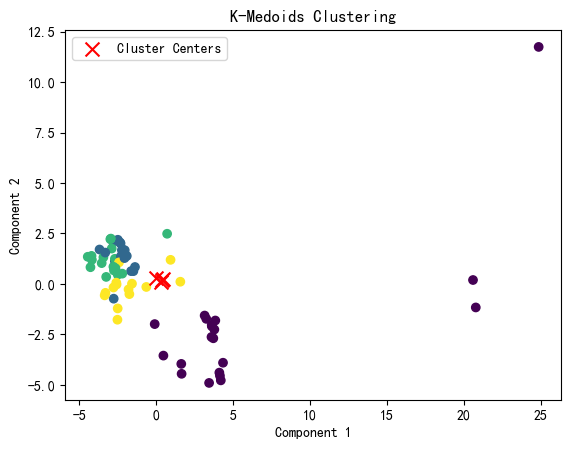

In [57]:
# 使用 PCA 将数据降维到 2D（如果数据是高维的）
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)

# 绘制数据点
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', marker='o')

# 绘制聚类中心
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Cluster Centers')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('K-Medoids Clustering')
plt.legend()
plt.show()


### 合理性和敏感性分析
1. 簇内距离 (Within-Cluster Sum of Distances, WCSS),簇内距离 (Within-Cluster Sum of Distances, WCSS)
2. DB指数 (Davies-Bouldin Index)
衡量簇内距离与簇间距离的比率。DB 指数越小，表示簇内紧凑且簇间分离效果越好。
3. Gap Statistic 值：Gap Statistic 值较高通常表示聚类效果较好。它衡量的是原始数据的聚类效果与参考数据的聚类效果之间的差异。值越高，表明原始数据的聚类效果相对于随机数据的改进越显著。
标准差：标准差反映了 Gap Statistic 计算的稳定性。较小的标准差表示 Gap Statistic 的计算结果较为稳定，较大的标准差表示结果可能有较大波动。

In [60]:
inertia = kmedoids.inertia_  # Inertia表示簇内距离的总和
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(X, kmedoids.labels_)

print("簇内距离的总和:",inertia)
print("DB指数",db_score)

簇内距离的总和: 7.137131
DB指数 1.9592984563612668


Original Gap Statistics: [0.15431231 0.12778174 0.45752042 0.77901676 0.68428096 0.6386092
 0.5890604  0.50631158 0.50904994]
Original Standard Deviation: [0.01446967 0.02157632 0.02180012 0.022475   0.05369199 0.04034577
 0.03374905 0.02636819 0.0351412 ]
Noisy Gap Statistics: [0.15137059 0.23329413 0.44532907 0.76951778 0.70694656 0.65084786
 0.61276384 0.57898383 0.51981341]
Noisy Standard Deviation: [0.01931237 0.06236406 0.02134546 0.04188218 0.04072094 0.0247119
 0.03584831 0.02331687 0.03037947]


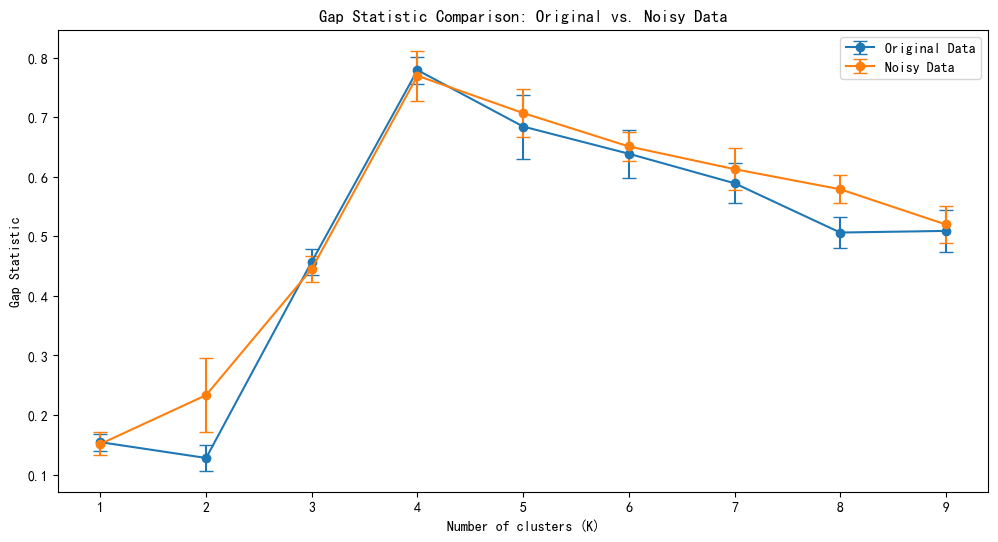

In [68]:
from scipy.spatial.distance import cdist
# 引入少量噪声
np.random.seed(42)
noise_strength = 0.02  # 噪声强度
X_noisy = X + noise_strength * np.random.normal(size=X.shape)

# 定义计算 Gap Statistic 的函数
def compute_gap_statistic(X, n_clusters_range):
    gap_stats = []
    std_devs = []
    n_refs = 10  # 生成参考数据集的数量
    
    for k in n_clusters_range:
        # K-Medoids 聚类
        kmedoids = KMedoids(n_clusters=k, random_state=0).fit(X)
        Wk = np.log(sum(np.min(cdist(X, kmedoids.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
        
        # 生成参考数据集
        Wk_refs = []
        for _ in range(n_refs):
            X_ref = np.random.uniform(np.min(X, axis=0), np.max(X, axis=0), size=X.shape)
            kmedoids_ref = KMedoids(n_clusters=k, random_state=0).fit(X_ref)
            Wk_ref = np.log(sum(np.min(cdist(X_ref, kmedoids_ref.cluster_centers_, 'euclidean'), axis=1)) / X_ref.shape[0])
            Wk_refs.append(Wk_ref)
        
        Wk_refs = np.array(Wk_refs)
        gap_stat = np.mean(Wk_refs) - Wk
        std_dev = np.std(Wk_refs) * np.sqrt(1 + 1/n_refs)
        
        gap_stats.append(gap_stat)
        std_devs.append(std_dev)
    
    return np.array(gap_stats), np.array(std_devs)

# 定义聚类数范围
n_clusters_range = range(1, 10)

# 计算原始数据集的 Gap Statistic
gap_stats_original, std_devs_original = compute_gap_statistic(X, n_clusters_range)

# 计算带噪声数据集的 Gap Statistic
gap_stats_noisy, std_devs_noisy = compute_gap_statistic(X_noisy, n_clusters_range)

# 打印结果进行比较
print("Original Gap Statistics:", gap_stats_original)
print("Original Standard Deviation:", std_devs_original)

print("Noisy Gap Statistics:", gap_stats_noisy)
print("Noisy Standard Deviation:", std_devs_noisy)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.errorbar(n_clusters_range, gap_stats_original, yerr=std_devs_original, label="Original Data", marker='o', capsize=5)
plt.errorbar(n_clusters_range, gap_stats_noisy, yerr=std_devs_noisy, label="Noisy Data", marker='o', capsize=5)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic Comparison: Original vs. Noisy Data')
plt.legend()
plt.show()

在 K=4 时，尽管 Gap Statistic 和标准差都有所变化，但最佳聚类数没有改变，最佳聚类数是4，这表明整体聚类效果对噪声具有一定的稳健性。

# 问题三

In [77]:
data3=pd.read_excel(r"D:\adocument\数学建模\24年国赛\训练\2022年\附件表单3.xlsx",sheet_name=0)
columns3=data3.columns
x3=data3[columns3[2:16]]
x3=log_data(x3)
y3_pred=clf.predict(x3)
label_mapping = {1: '高钾', 2: '铅钡'}
print(y3_pred)
y3_pred_label=[label_mapping[label] for label in y3_pred]
print(y3_pred_label)


[1 2 2 2 2 1 1 2]
['高钾', '铅钡', '铅钡', '铅钡', '铅钡', '高钾', '高钾', '铅钡']


# 问题四

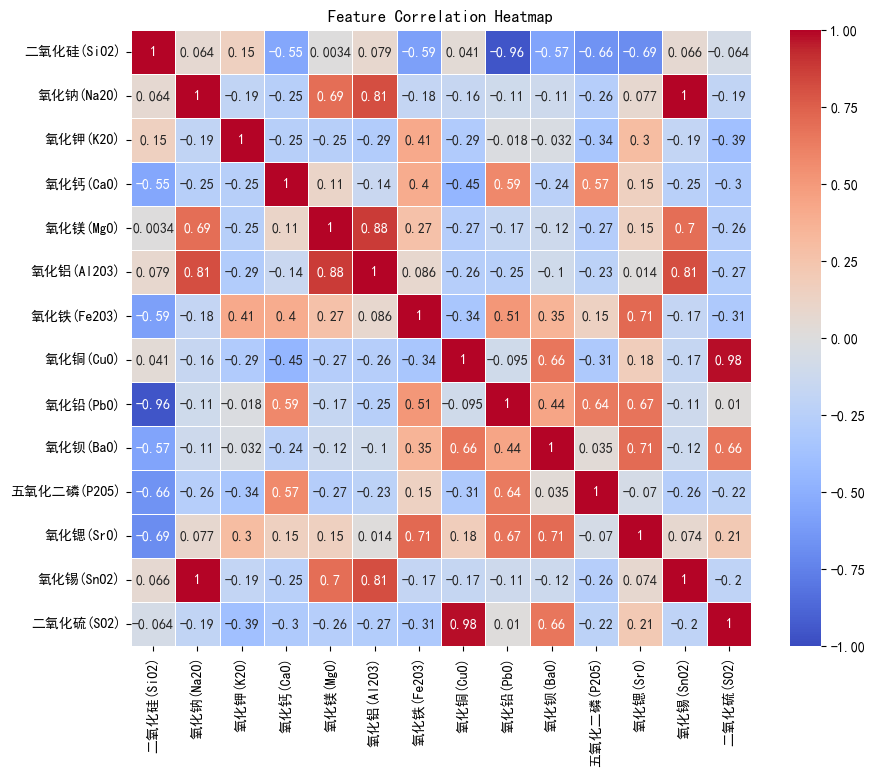

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = x.corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()